# Simulação de um conversor Cuk 

O problema proposto é a simulação do conversor Cuk com os parametros a seguir no tempo.

$$Vin = 30V$$
$$L1 = 22uH$$
$$L2 = 22uH$$
$$Cc = 10uF$$
$$Co = 100uF$$
$$Rl = 5$$
$$Freq = 100e3$$


## Porque simular o conversor Cuk?

O conversor Cuk é um tipo de conversor DC-DC que é utilizado para alterar o nível de tensão. Este conversor possui uma complexidade inerente devido à sua configuração de chaveamento, que inclui duas bobinas (indutores) e dois capacitores. Este arranjo cria dinâmicas não-lineares, tornando a análise e a otimização desafiadoras.

No contexto do projeto de pesquisa do barco solar, o conversor Cuk desempenha um papel crucial na gestão eficiente da energia solar captada pelos painéis solares. Uma análise detalhada do comportamento deste conversor permite entender como ele opera sob diferentes condições, o que é essencial para garantir a eficiência e a confiabilidade do sistema de energia do barco.

A análise do comportamento do conversor é vital para identificar potenciais falhas ou ineficiências. Compreender o comportamento do conversor em diferentes estados (chave fechada e chave aberta) permite aos pesquisadores e engenheiros ajustar o design para melhorar o desempenho, a eficiência e a confiabilidade do sistema.

## Porque não é possível simular o conversor Cuk de forma analitica?

O conversor Cuk é um sistema eletrônico não linear devido ao seu modo de operação de chaveamento. As equações que descrevem o comportamento do conversor envolvem variáveis que se alteram de forma não linear em função do tempo, especialmente devido à abertura e fechamento da chave. Essa não linearidade torna extremamente difícil, senão impossível, encontrar uma solução analítica fechada para o sistema.

## Escolher e justificar a escolha de um método numérico que resolva o problema proposto;

O método de Runge-Kutta de terceira ordem (RK3) é uma escolha eficaz para resolver o problema da simulação do conversor Cuk por várias razões:

- Precisão e Eficiência: O RK3 oferece um bom equilíbrio entre precisão e eficiência computacional. Para muitos sistemas dinâmicos, incluindo circuitos eletrônicos como o conversor Cuk, o RK3 fornece uma aproximação suficientemente precisa da solução real das equações diferenciais sem o custo computacional elevado de métodos de ordem superior.

- Tratamento de Não Linearidades: O conversor Cuk é um sistema não linear, e o método RK3 é particularmente eficaz no tratamento de equações diferenciais não lineares. Ele consegue aproximar com precisão o comportamento do sistema ao longo do tempo, capturando as dinâmicas complexas causadas pelo chaveamento e interações entre componentes.

- Estabilidade Numérica: O método RK3 é conhecido por sua estabilidade numérica em uma variedade de situações. Esta característica é crucial ao lidar com sistemas que podem apresentar comportamentos dinâmicos rápidos ou instáveis, como é o caso em alguns estados operacionais do conversor Cuk.



## Resolvendo o circuito

**O circuito**

![Cuk](./assets/cuk-circuit.png)

Para resolver o circuito será dividido em 2 partes, a primeira parte será o circuito com a chave fechada e a segunda parte com a chave aberta.

### Resolvendo o circuito para quando a chave está fechada

![Cuk on](./assets/cuk-on.png)

Usando as leis de Kirchhoff, temos:

$$
\begin{align}
\frac{dl_1}{dt} = \frac{V_in}{L_1} \\
\frac{dl_2}{dt} = \frac{-V_{c_1} -V_{c_2}}{L_2} \\
\frac{dV_{c_1}}{dt} = \frac{I_{l_1}}{C_1} \\
\frac{dV_{c_2}}{dt} = \frac{I_{l_2} - \frac{V_{c_1}}{R}}{C_2} \\
\end{align}
$$





### Resolvendo o circuito para quando a chave está aberta

![Cuk off](./assets/cuk-off.png)

$$
\begin{align}
\frac{dl_1}{dt} = \frac{V_in - V_{c_1}}{L_1} \\
\frac{dl_2}{dt} = \frac{-V_{c_2}}{L_2} \\
\frac{dV_{c_1}}{dt} = \frac{I_{l_1}}{C_1} \\
\frac{dV_{c_2}}{dt} = \frac{I_{l_2} - \frac{V_{c_1}}{R}}{C_2} \\
\end{align}
$$


### Simulação

Para a simulação sera resolvido o circuito usando a equação diferencial do circuito com a chave fechada quando a chave estiver fechada e a equação diferencial do circuito com a chave aberta quando a chave estiver aberta.


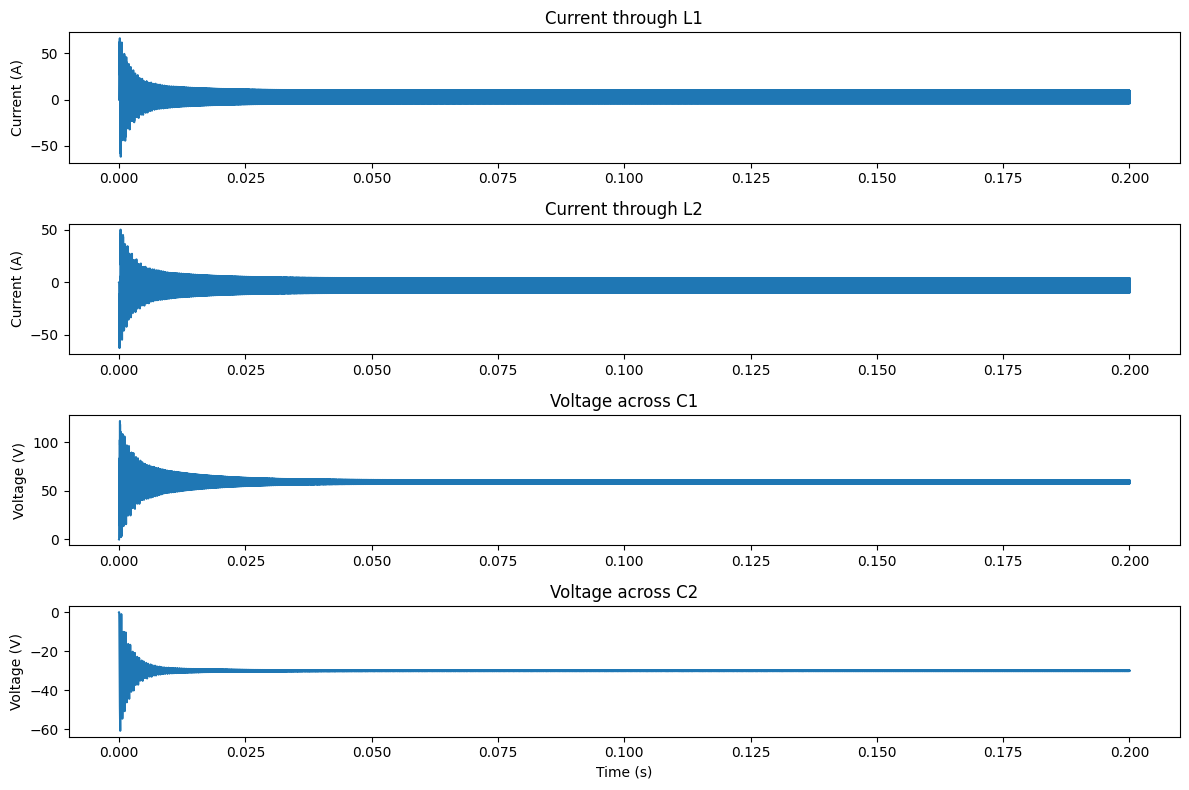

(0.05, 0.050120000000000005)

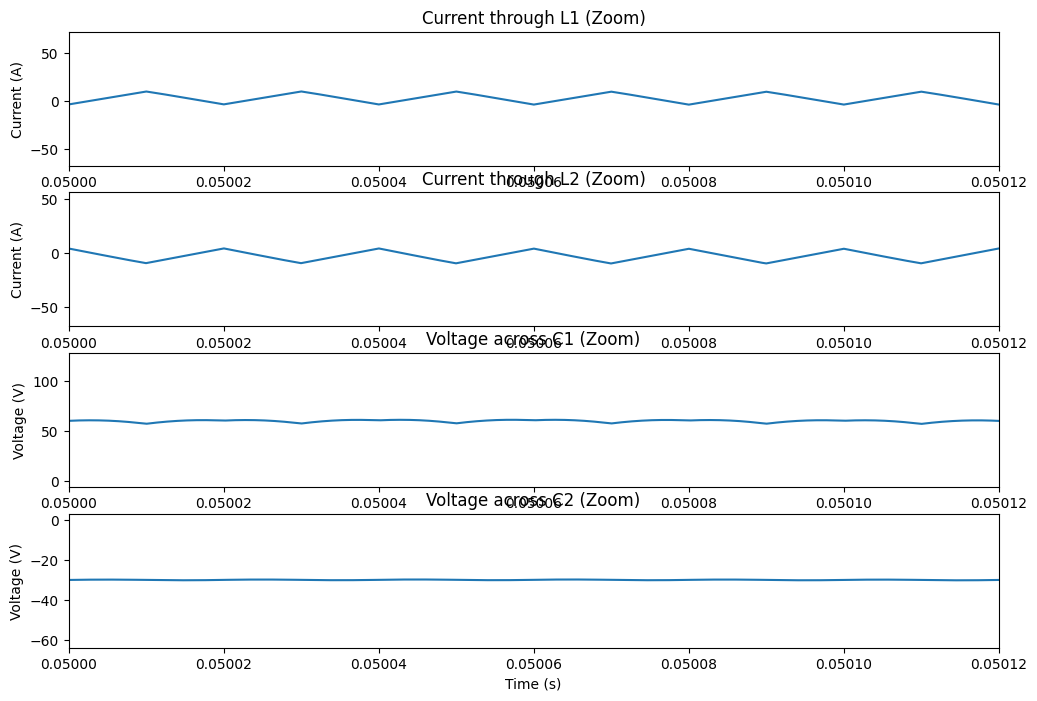

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants and Parameters
Vi = 30    # Input voltage in Volts
L1 = 22e-6  # Inductance of L1 in Henrys
L2 = 22e-6  # Inductance of L2 in Henrys
C1 = 10e-6 # Capacitance of C1 in Farads
C2 = 100e-6 # Capacitance of C2 in Farads
Ro = 10   # Output load resistance in Ohms

# Differential equation for Closed Switch State
def cuk_converter_closed(t, y):
	i_L1, i_L2, v_C1, v_C2 = y
	di_L1_dt = (Vi) / L1
	di_L2_dt = (-v_C1 - v_C2) / L2
	dv_C1_dt = i_L2 / C1
	dv_C2_dt = (i_L2 - v_C2 / Ro) / C2
	return [di_L1_dt, di_L2_dt, dv_C1_dt, dv_C2_dt]

# Differential equation for Open Switch State
def cuk_converter_open(t, y):
	i_L1, i_L2, v_C1, v_C2 = y
	di_L1_dt = (Vi - v_C1) / L1
	di_L2_dt = - (v_C2) / L2
	dv_C1_dt = i_L1 / C1
	dv_C2_dt = (i_L2 - v_C2 / Ro) / C2
	return [di_L1_dt, di_L2_dt, dv_C1_dt, dv_C2_dt]

# Initial conditions
initial_conditions = [0, 0, 0, 0]  # i_L1(0), i_L2(0), v_C1(0), v_C2(0)


MAX_SIM_TIME = 0.2
TIME_STEP = 1e-3

switch_period = 1 / 50e3

duty_cycle = 0.5

t = 0

t_points = []
i_L1_points = []
i_L2_points = []
v_C1_points = []
v_C2_points = []

while t < MAX_SIM_TIME:

	# Simulate for a switching period
	t_span = (t, t + switch_period * duty_cycle)

	# Solve the ODE for Closed Switch State
	solution_closed = solve_ivp(
		cuk_converter_closed,
		t_span,
		initial_conditions,
		t_eval = np.linspace(*t_span, int(1 / (TIME_STEP))),
		method="RK23",
		
		)
	t += switch_period * duty_cycle

	# Use the final state of the Closed Switch State as the initial state for the Open Switch State
	initial_conditions = solution_closed.y[:, -1]

	# Simulate for a switching period
	t_span = (t, t + switch_period * duty_cycle)
	

	# Save the points for plotting
	t_points.extend(solution_closed.t)
	i_L1_points.extend(solution_closed.y[0])
	i_L2_points.extend(solution_closed.y[1])
	v_C1_points.extend(solution_closed.y[2])
	v_C2_points.extend(solution_closed.y[3])

	# Solve the ODE for Open Switch State
	solution_open = solve_ivp(
		cuk_converter_open, 
		t_span, 
		initial_conditions, 
		t_eval = np.linspace(*t_span, int(1 / TIME_STEP)),
		method="RK23"
	)
	t += switch_period * duty_cycle

	# Use the final state of the Open Switch State as the initial state for the next iteration
	initial_conditions = solution_open.y[:, -1]

	# Save the points for plotting
	t_points.extend(solution_open.t)
	i_L1_points.extend(solution_open.y[0])
	i_L2_points.extend(solution_open.y[1])
	v_C1_points.extend(solution_open.y[2])
	v_C2_points.extend(solution_open.y[3])



# Plotting results for Closed Switch State
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t_points, i_L1_points)
plt.title('Current through L1')
plt.ylabel('Current (A)')

plt.subplot(4, 1, 2)
plt.plot(t_points, i_L2_points)
plt.title('Current through L2')
plt.ylabel('Current (A)')

plt.subplot(4, 1, 3)
plt.plot(t_points, v_C1_points)
plt.title('Voltage across C1')
plt.ylabel('Voltage (V)')

plt.subplot(4, 1, 4)
plt.plot(t_points, v_C2_points)
plt.title('Voltage across C2')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()
plt.grid()

# Plot zoom on 0.050 to 0.060 seconds
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t_points, i_L1_points)
plt.title('Current through L1 (Zoom)')
plt.ylabel('Current (A)')
plt.xlim(0.050, 0.050 + (6 * switch_period))

plt.subplot(4, 1, 2)
plt.plot(t_points, i_L2_points)
plt.title('Current through L2 (Zoom)')
plt.ylabel('Current (A)')
plt.xlim(0.050, 0.050 + (6 * switch_period))

plt.subplot(4, 1, 3)
plt.plot(t_points, v_C1_points)
plt.title('Voltage across C1 (Zoom)')
plt.ylabel('Voltage (V)')
plt.xlim(0.050, 0.050 + (6 * switch_period))

plt.subplot(4, 1, 4)
plt.plot(t_points, v_C2_points)
plt.title('Voltage across C2 (Zoom)')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.xlim(0.050, 0.050 + (6 * switch_period))
plt.grid()






## Conclusão

Os resultados da simulação acompanharam o comportamento teorico de um cuk, corrente nos indutores com formato de triangulo. Também foi simulado no PSIM para comparar os resultados e os resultados foram similares.

![psim](./assets/psim.png)

